In [1]:
## Please install torch and datasets
import torch
from torchvision.transforms import functional as t
import torch.nn.functional as f
from datasets import load_dataset


c:\Users\tavi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
## Loading our dataset
ds = load_dataset("ylecun/mnist")

In [3]:
## Data splits
# The train split is used for training the model.
# There is a possibility that instead of learning to read numbers our model 
# starts memorising the answers to each training example. To check for this,
# we have a seperate test split. If the model performs just as good on the test 
# split as it does on the train split, our model has learned instead of memorised.

X_train_p = ds["train"]["image"]
Y_train = ds["train"]["label"]
X_test_p = ds["test"]["image"]
Y_test = ds["test"]["label"]

In [4]:
print(X_train_p[0], Y_train[0])

<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x1C258ED1EE0> 5


In [5]:
X_train = [t.pil_to_tensor(x) for x in X_train_p]
X_test = [t.pil_to_tensor(x) for x in X_test_p]

# Tavish, make sure you explain what tensors are and what shape is
X_train = torch.stack(X_train)
X_test = torch.stack(X_test)
print(X_train.shape, X_test.shape)

torch.Size([60000, 1, 28, 28]) torch.Size([10000, 1, 28, 28])


In [6]:
## Fixing the shape

X_train = X_train.view(-1, 28, 28)
X_test = X_test.view(-1, 28, 28)
print(X_train.shape, X_test.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [7]:
Y_train = torch.tensor(Y_train)
Y_test = torch.tensor(Y_test)

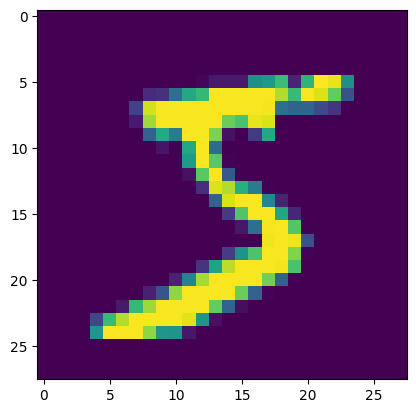

In [8]:
## Let's look at the image

import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [9]:
## Showing that different training examples will remain seperate by flattening the image in the manner we will
a = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
print(a, '\n', a.view(-1, 4))

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]]) 
 tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])


In [10]:
## Flattening the image as DNN takes flat tensor as input

X_train = X_train.view(-1, 784).float() / 255.0
X_test = X_test.view(-1, 784).float() / 255.0
print(X_train.shape, X_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784])


In [11]:
## Explaining broadcasting

a = torch.tensor([[1,2],[3,4]])
print(a)

# Check the difference by commenting one of these lines
b = torch.tensor([1,2])
b = torch.tensor([[1],[2]])
print(b)

a+b

tensor([[1, 2],
        [3, 4]])
tensor([[1],
        [2]])


tensor([[2, 3],
        [5, 6]])

In [12]:
## Definining our model
# Let's make a network with 2 hidden layer and 1 output layer

# Weight matrices have shape (number of inputs) x (number of neurons)
# Bias matrices have shape (batch size) x (number of neurons) where all rows have the same values
# Because all rows are the same, we can use broadcasting.

n1 = 128
n2 = 64
n3 = 10

W1 = torch.randn(784, n1)
B1 = torch.randn(n1)

W2 = torch.randn(n1, n2)
B2 = torch.randn(n2)

W3 = torch.randn(n2, n3)
B3 = torch.randn(n3)

params = [W1, B1, W2, B2, W3, B3]
for p in params:
    p.requires_grad = True

In [18]:
## Training
iters = 1000
alpha = 0.05

for i in range(iters):
    # Forward Pass
    Y1_preactivation = X_train@W1 + B1
    Y1 = torch.tanh(Y1_preactivation)
    Y2_preactivation = Y1@W2 + B2
    Y2 = torch.tanh(Y2_preactivation)
    logits = Y2@W3 + B3
    probs = f.softmax(logits, 1)


    # Loss
    # Show documentation for expected data-type
    L = f.cross_entropy(logits, Y_train)

    # Calculating Gradient
    for p in params:
        p.grad = None
        
    L.backward()    

    # Weight Update
    for p in params:
        p.data += -alpha * p.grad

    if i % (iters/20) == 0:
        print(L)


tensor(1.2333, grad_fn=<NllLossBackward0>)
tensor(1.1996, grad_fn=<NllLossBackward0>)
tensor(1.1684, grad_fn=<NllLossBackward0>)
tensor(1.1393, grad_fn=<NllLossBackward0>)
tensor(1.1121, grad_fn=<NllLossBackward0>)
tensor(1.0865, grad_fn=<NllLossBackward0>)
tensor(1.0624, grad_fn=<NllLossBackward0>)
tensor(1.0397, grad_fn=<NllLossBackward0>)
tensor(1.0183, grad_fn=<NllLossBackward0>)
tensor(0.9980, grad_fn=<NllLossBackward0>)
tensor(0.9788, grad_fn=<NllLossBackward0>)
tensor(0.9605, grad_fn=<NllLossBackward0>)
tensor(0.9432, grad_fn=<NllLossBackward0>)
tensor(0.9268, grad_fn=<NllLossBackward0>)
tensor(0.9112, grad_fn=<NllLossBackward0>)
tensor(0.8963, grad_fn=<NllLossBackward0>)
tensor(0.8822, grad_fn=<NllLossBackward0>)
tensor(0.8687, grad_fn=<NllLossBackward0>)
tensor(0.8559, grad_fn=<NllLossBackward0>)
tensor(0.8436, grad_fn=<NllLossBackward0>)


In [16]:
## Showing how to get max value 

a = torch.tensor([[2,1],[3,4]])

print(a)
a.argmax(1)

tensor([[2, 1],
        [3, 4]])


tensor([0, 1])

In [24]:
def accuracy(X, Y):
    # Forward
    Y1_preactivation = X@W1 + B1
    Y1 = torch.tanh(Y1_preactivation)
    Y2_preactivation = Y1@W2 + B2
    Y2 = torch.tanh(Y2_preactivation)
    logits = Y2@W3 + B3
    probs = f.softmax(logits, 1)
    answers = logits.argmax(1)
    c = 0
    for a, y in zip(answers, Y): 
        if a==y: c+=1
    return c / answers.shape[0] * 100

def loss(X, Y):
    Y1_preactivation = X@W1 + B1
    Y1 = torch.tanh(Y1_preactivation)
    Y2_preactivation = Y1@W2 + B2
    Y2 = torch.tanh(Y2_preactivation)
    logits = Y2@W3 + B3
    return f.cross_entropy(logits, Y)


print(f"train accuracy: {accuracy(X_train, Y_train)} | test accuracy: {accuracy(X_test, Y_test)}")
print(f"train loss: {loss(X_train, Y_train)} | test loss: {loss(X_test, Y_test)}")

train accuracy: 77.86666666666666 | test accuracy: 75.09
train loss: 0.8318520188331604 | test loss: 0.9857254028320312


tensor([1])


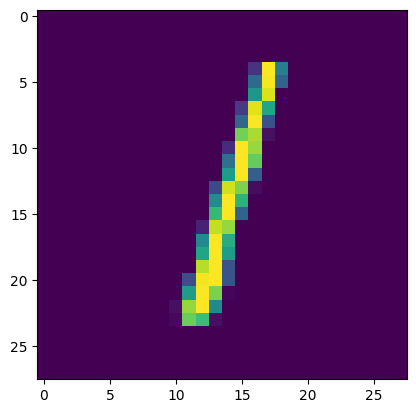

In [28]:
sample = torch.stack([X_test[2]])
plt.imshow(sample.view(28, 28))

Y1_preactivation = sample@W1 + B1
Y1 = torch.tanh(Y1_preactivation)
Y2_preactivation = Y1@W2 + B2
Y2 = torch.tanh(Y2_preactivation)
logits = Y2@W3 + B3
probs = f.softmax(logits, 1)
answer = logits.argmax(1)
print(answer)